In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Time_Series/Time_Series/Rainfall_Lagos.csv')

# Prepare the data
df_prophet = df[['Year', 'Rainfall']].rename(columns={'Year': 'ds', 'Rainfall': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

In [ ]:
# Split data: 80% train, 30% test
split_index = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:split_index]
test = df_prophet.iloc[split_index:]

In [ ]:
# Fit the model
model = Prophet(yearly_seasonality=True)
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfz27v2y/nkz_ixl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvfz27v2y/30vkv0t6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91326', 'data', 'file=/tmp/tmpvfz27v2y/nkz_ixl_.json', 'init=/tmp/tmpvfz27v2y/30vkv0t6.json', 'output', 'file=/tmp/tmpvfz27v2y/prophet_modelblcn5_w2/prophet_model-20250815213233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Forecast on test data (for evaluation)
future_test = test[['ds']]
forecast_test = model.predict(future_test)

In [ ]:
# Calculate error metrics
y_true = test['y'].values
y_pred = forecast_test['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
accuracy = 100 - mape

# Print errors
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"Estimated Accuracy: {accuracy:.2f}%")


MAE: 214.124
RMSE: 276.971
MAPE: 13.16%
Estimated Accuracy: 86.84%


In [ ]:
# Forecast next 25 years from the **last year in your dataset**
future = model.make_future_dataframe(periods=60, freq='YE')
forecast = model.predict(future)

In [ ]:
# Filter only forecasted years 2025 to 2050
forecast_filtered = forecast[(forecast['ds'].dt.year >= 2025) & (forecast['ds'].dt.year <= 2050)]

In [ ]:
# Show or save the filtered forecast
print(forecast_filtered[['ds', 'yhat']])
forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("Forecast_2025_to_2055.csv", index=False)

            ds         yhat
76  2025-12-31  2124.106818
77  2026-12-31  2241.465352
78  2027-12-31  2380.100173
79  2028-12-31  2027.184554
80  2029-12-31  2123.067763
81  2030-12-31  2240.426297
82  2031-12-31  2379.061118
83  2032-12-31  2026.145499
84  2033-12-31  2122.028708
85  2034-12-31  2239.387243
86  2035-12-31  2378.022063
87  2036-12-31  2025.106444
88  2037-12-31  2120.989654
89  2038-12-31  2238.348188
90  2039-12-31  2376.983008
91  2040-12-31  2024.067389
92  2041-12-31  2119.950599
93  2042-12-31  2237.309133
94  2043-12-31  2375.943953
95  2044-12-31  2023.028334
96  2045-12-31  2118.911544
97  2046-12-31  2236.270078
98  2047-12-31  2374.904898
99  2048-12-31  2021.989279
100 2049-12-31  2117.872489
101 2050-12-31  2235.231023


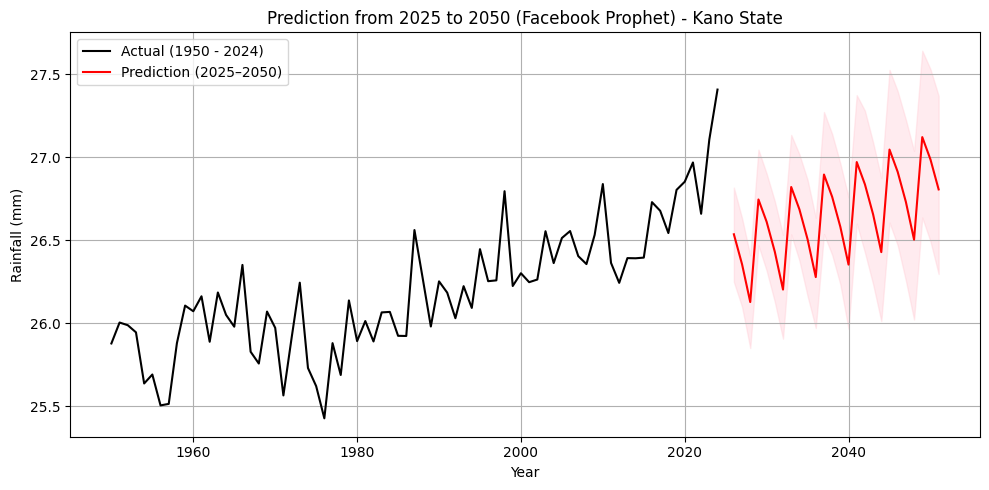

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual (1950 - 2024)', color='black')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Prediction (2025–2050)', color='red')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Prediction from 2025 to 2050 (Facebook Prophet) - Kano State")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

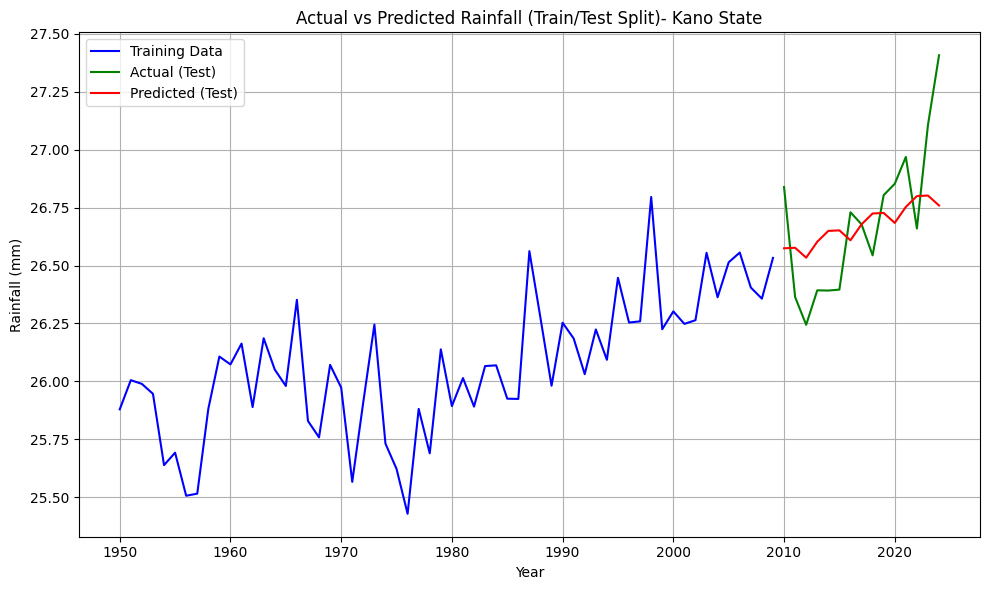

In [ ]:
# Merge actual and predicted values
df_compare = test.copy()
df_compare['yhat'] = forecast_test['yhat'].values

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual (Test)', color='green')
plt.plot(test['ds'], df_compare['yhat'], label='Predicted (Test)', color='red')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall (Train/Test Split)- Kano State')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
